# Playstore Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/Users/Dell/Documents/playstore-analysis.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dataset.shape

(10841, 13)

In [5]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
dataset.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data clean up – Missing value treatment

# a. Drop records where rating is missing since rating is our target/study variable

In [9]:
dataset.dropna(subset=["Rating"],inplace=True)

In [10]:
dataset["Rating"].isnull().sum()

0

# b. Check the null values for the Android Ver column.

In [11]:
dataset[dataset["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# i. Are all 3 records having the same problem?

Yes, all the 3 records have same problem as they all have "NaN" (Null values) to the respected column.

# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
dataset.drop([10472], inplace = True)

In [13]:
dataset[dataset["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


# iii. Replace remaining missing values with the mode

In [14]:
dataset['Android Ver'].fillna(dataset['Android Ver'].mode()[0], inplace=True)

# c. Current ver – replace with most common value

In [15]:
dataset['Current Ver'].fillna(dataset['Current Ver'].mode()[0], inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# 2. Data clean up – correcting the data types

# a. Which all variables need to be brought to numeric types?

In [18]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# b. Price variable – remove $ sign and convert to float

In [19]:
dataset["Price"]=dataset["Price"].apply((lambda x: str(x).replace('$','')if '$' in str(x) else str(x))) 

In [20]:
dataset["Price"]=dataset["Price"].apply(lambda x: float(x))
dataset["Price"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [21]:
dataset["Installs"]=dataset["Installs"].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))
dataset["Installs"]=dataset["Installs"].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))

In [22]:
dataset["Installs"]=dataset["Installs"].apply(lambda x: int(x))
dataset["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

# d. Convert all other identified columns to numeric

In [23]:
dataset.describe()

,Rating,Size,Installs,Price
count,9366.000000,9366.000000,9.366000e+03,9366.000000
mean,4.191757,22705.733752,1.789744e+07,0.960928
std,0.515219,21305.040123,9.123822e+07,15.816585
min,1.000000,8.500000,1.000000e+00,0.000000
25%,4.000000,6600.000000,1.000000e+04,0.000000
50%,4.300000,21000.000000,5.000000e+05,0.000000
75%,4.500000,27000.000000,5.000000e+06,0.000000
max,5.000000,100000.000000,1.000000e+09,400.000000


# 3. Sanity checks – check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [24]:
pd.unique(dataset[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# i. Are there any such records? Drop if so.

In [25]:
dataset.loc[dataset.Rating < 1] & dataset.loc[dataset.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
No such record has been observed.

# b. Reviews should not be more than installs as only those who installed can review the app.

# i. Are there any such records? Drop if so.

In [26]:
dataset["Reviews"]=dataset["Reviews"].apply(lambda x: int(x))
dataset["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int64

In [27]:
dataset[dataset.Reviews > dataset.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [28]:
index=dataset[dataset.Reviews>dataset.Installs].index
dataset.drop(labels=index, inplace=True)

In [29]:
dataset[dataset.Reviews > dataset.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –

# a. Price column

# i. Make suitable plot to identify outliers in price

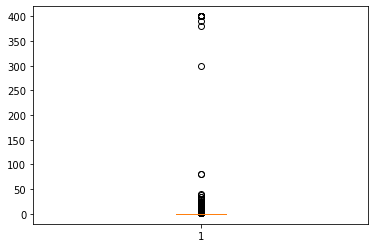

In [30]:
plt.boxplot(dataset["Price"])
plt.show()

# ii. Do you expect apps on the play store to cost $200? Check out these cases


In [31]:
dataset.loc[dataset['Price'] >= 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [ ]:
Yes we can expect apps on the play store to cost $200 as we have prices listed greater than $399.

# iv. Limit data to records with price < $30

In [33]:
limit_data.shape

(9338, 13)

In [ ]:
As per condition, we have got data of rows 9338.

# iii. After dropping the useless records, make the suitable plot again to identify outliers

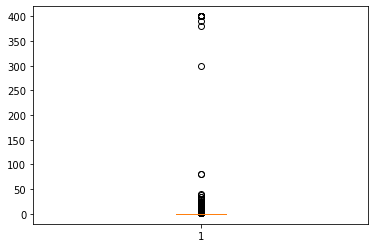

In [34]:
plt.boxplot(dataset['Price'])
plt.show()

# b. Reviews column

# i. Make suitable plot

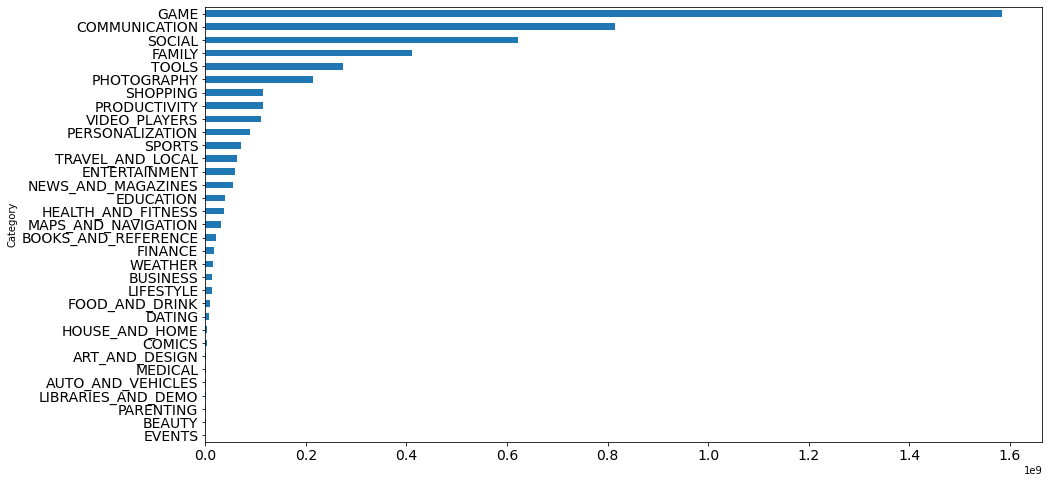

In [35]:
total = dataset.groupby("Category")["Reviews"].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind="barh", fontsize=14)
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [36]:
limit_data_by_review = dataset[dataset["Reviews"] < 1000000]
limit_data_by_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
limit_data_by_review.shape

(8655, 13)

# c. Installs

# i. What is the 95th percentile of the installs?

In [38]:
Percentile = dataset.Installs.quantile(0.95) 
print(Percentile,"is 95th percentile of Installs")

100000000.0 is 95th percentile of Installs


# ii. Drop records having a value more than the 95th percentile

In [40]:
x = dataset.Installs.quantile() > Percentile
print (x)

False


In [ ]:
There is no such values more than the 95th percentile.

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

# a. How do you explain this?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


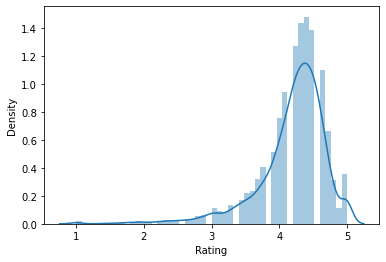

The skewness of this distribution is -1.8530611951252525
The Median of this distribution 4.3 is greater than mean 4.191174270755429 of this distribution


In [41]:
sns.distplot(dataset['Rating'])
plt.show()
print('The skewness of this distribution is',dataset['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(dataset.Rating.median(),dataset.Rating.mean()))

In [ ]:
Here, you can see three measures position on the plot. So, you will find that: the distribution tells - most of the rating is in between 4 to 5.

# b. What is the implication of this on your analysis?

In [42]:
dataset['Rating'].mode()

0    4.4
dtype: float64

In [ ]:
Here, mode>= median > mean, the distribution of Rating is negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?

# a. Are there any values with very few records?

In [43]:
dataset['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
"Adults only 18+" and "Unrated" are values with very few records so it will be dropped.

# b. If yes, drop those as they won’t help in the analysis

In [44]:
Adult_rating = dataset[dataset['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =dataset[dataset['Content Rating'] == 'Unrated'].index.to_list()
dataset.drop(Adult_rating, inplace = True)
dataset.drop(unrated, inplace = True)
dataset['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

# a. Make a joinplot to understand the effect of size on rating

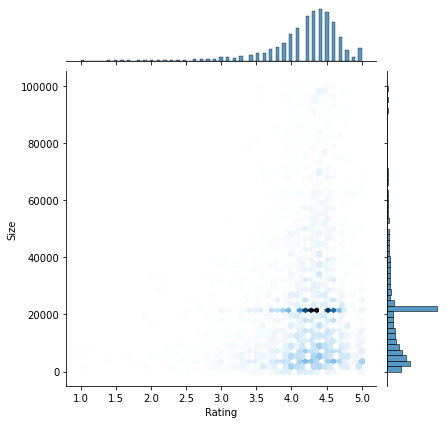

In [45]:
sns.jointplot(x=dataset['Rating'],y=dataset['Size'],data=dataset,kind='hex')
plt.show()

# b. Do you see any patterns?

In [ ]:
The maximum data Size gathered in between Rating 4.0-4.5 and size 0-20000(20 mb). It means that the application size which is around 20000(20 mb) supposed to have good rating on play store.

# c. How do you explain the pattern?

In [ ]:
As it can be seen that the application which is "very popular, In big amount of use, easy to use, Most secured" can also be developed at much comfort size for the users with a smart end creative knowledge. It is not important to have a greater rating should be the bigger in size too...

# 8. Effect of price on rating

# a. Make a jointplot (with regression line)

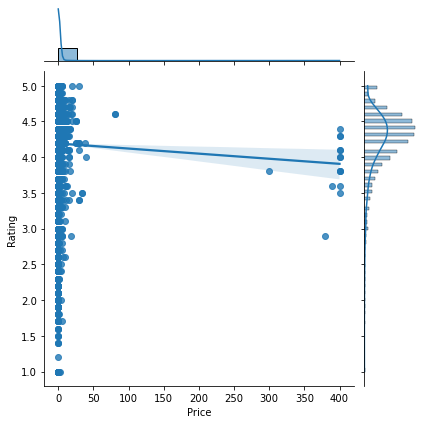

In [46]:
sns.jointplot(x ="Price" , y = "Rating" , kind='reg', data = dataset)
plt.show()

# b. What pattern do you see?

In [ ]:
Increasing the price, Rating Decreases . But it's not like much of a fall as Rating almost sticking around 4.0.

# c. How do you explain the pattern?

In [ ]:
As Increasing the price, Rating Decreases. Thus, it can be concluded that there is very weak Positive correlation between Rating and Price.

In [47]:
dataset.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068399,0.078886,0.051636,-0.021899
Reviews,0.068399,1.000000,0.125459,0.641600,-0.009826
Size,0.078886,0.125459,1.000000,0.075375,-0.025648
Installs,0.051636,0.641600,0.075375,1.000000,-0.011898
Price,-0.021899,-0.009826,-0.025648,-0.011898,1.000000


# d. Replot the data, this time with only records with price > 0

# e. Does the pattern change?

In [ ]:
Yes, On limiting the record with Price > 0, the overall pattern changed a slight i.e. there is very weak Negative Correlation between Price and Rating.

In [49]:
Price_greaterthan_zero.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.044118,0.116286,0.060133,-0.112165
Reviews,0.044118,1.000000,0.035571,0.867304,-0.015098
Size,0.116286,0.035571,1.000000,0.075057,-0.077510
Installs,0.060133,0.867304,0.075057,1.000000,-0.023623
Price,-0.112165,-0.015098,-0.077510,-0.023623,1.000000


# f. What is your overall inference on the effect of price on the rating

In [ ]:
Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

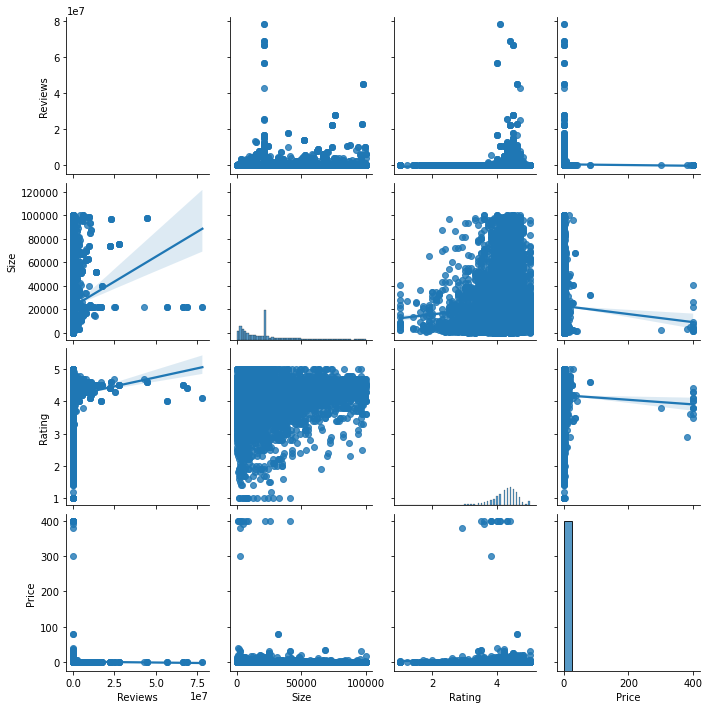

In [53]:
sns.pairplot(dataset, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating

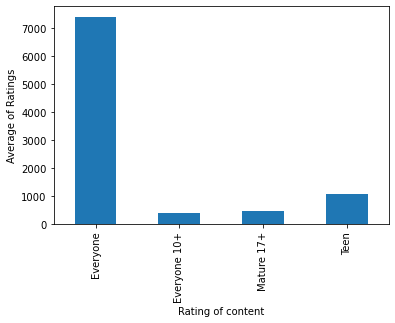

In [55]:
a = dataset['Rating'].groupby(dataset['Content Rating']).count().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?

In [ ]:
We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

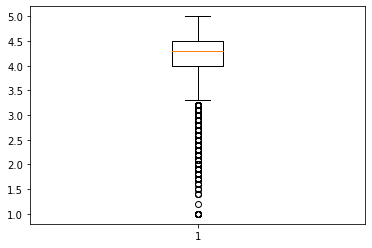

In [56]:
plt.boxplot(dataset['Rating'])
plt.show()

# c. Choose the right metric and plot

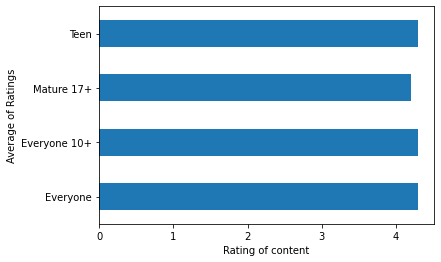

In [57]:
a = dataset['Rating'].groupby(dataset['Content Rating']).median().plot(kind = 'barh')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

# a. Create 5 buckets (20% records in each) based on Size

In [58]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
dataset['Bucket Size'] = pd.cut(dataset['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(dataset, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.148721,4.247561,4.015183,4.187047
20k-40k,4.228845,4.197802,4.195109,4.237590
40k-60k,4.192505,4.265957,4.202222,4.270896
60k-80k,4.271774,4.374000,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [59]:
Bucket_Size=pd.pivot_table(dataset, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
Bucket_Size

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this

# i. Annotated

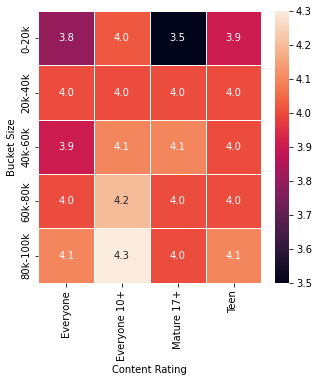

In [60]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(Bucket_Size, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

# ii. Greens color map

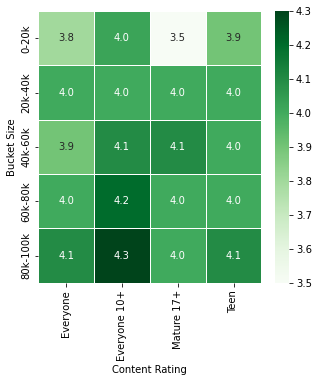

In [61]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(Bucket_Size, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [ ]:
Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.